# NBA API setup and exercise
### If you want to play around with the NBA API shown in Week 4, here's how

## Prerequisite 1: Download the API
Open a terminal on your computer and enter the following to download the API:
<code>pip install nba_api</code>
Next, enter the following to download Requests (note: for more info, visit https://pypi.org/project/nba-api/)
<code>$ python -m pip install requests</code>

## Prerequisite 2: Import matplotlib, pandas, and some data from nba_api
No need to use the terminal anymore, this will execute right in your Jupyter Notebook

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from nba_api.stats.static import teams
nba_teams = teams.get_teams()

## Let's Get to It
From here on, this notebook is essentially just the slides from the lesson video, transcribed into notebook form so you can play around with NBA stats using Python, Pandas, and Numpy!

In [3]:
nba_teams[:5]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Atlanta',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970},
 {'id': 1610612740,
  'full_name': 'New Orleans Pelicans',
  'abbreviation': 'NOP',
  'nickname': 'Pelicans',
  'city': 'New Orleans',
  'state': 'Louisiana',
  'year_founded': 2002},
 {'id': 1610612741,
  'full_name': 'Chicago Bulls',
  'abbreviation': 'CHI',
  'nickname': 'Bulls',
  'city': 'Chicago',
  'state': 'Illinois',
  'year_founded': 1966}]

In [11]:
def one_dict(list_dict):
    keys = list_dict[0].keys()
    out_dict={key:[] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict

dict_nba_team=one_dict(nba_teams)

df_teams=pd.DataFrame(dict_nba_team)
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [12]:
df_warriors=df_teams[df_teams['nickname']=='Warriors']
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [15]:
id_warriors=df_warriors[['id']].values[0][0]
id_warriors

1610612744

In [17]:
from nba_api.stats.endpoints import leaguegamefinder
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)

In [24]:
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22020,1610612744,GSW,Golden State Warriors,0022000001,2020-12-22,GSW @ BKN,L,240,99,...,0.652,13.0,34.0,47.0,26,6,6,18,24,-23.0
1,12020,1610612744,GSW,Golden State Warriors,0012000038,2020-12-17,GSW @ SAC,W,239,113,...,0.833,9.0,45.0,54.0,20,10,8,18,29,8.0
2,12020,1610612744,GSW,Golden State Warriors,0012000027,2020-12-15,GSW @ SAC,L,240,113,...,0.621,10.0,43.0,53.0,28,13,8,16,21,-4.0
3,12020,1610612744,GSW,Golden State Warriors,0012000011,2020-12-12,GSW vs. DEN,W,238,107,...,0.743,5.0,34.0,39.0,25,7,7,17,31,4.2
4,22019,1610612744,GSW,Golden State Warriors,0021900967,2020-03-10,GSW vs. LAC,L,239,107,...,0.815,4.0,31.0,35.0,25,3,0,9,17,-24.0


In [19]:
games_home=games[games['MATCHUP']=='GSW vs. TOR']
games_away=games[games['MATCHUP']=='GSW @ TOR']

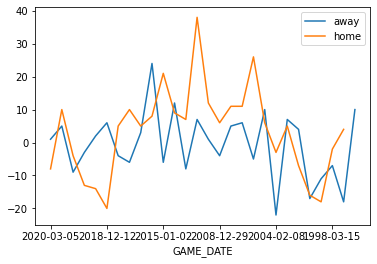

In [20]:
fig, ax = plt.subplots()
games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(['away','home'])
plt.show()